In [35]:
import pandas as pd 
import matplotlib.pyplot as plt
import time 
from scipy.cluster.hierarchy import linkage, dendrogram

In [60]:
data = pd.read_csv("data/data-final_nosso_big5.csv", sep= '\t')

In [61]:
data = data.dropna()

In [62]:
data = data[data['country']!= 'NONE']

In [63]:
US = data[data['country']=='US']
CA = data[data['country']=='CA']
PT = data[data['country']=='PT'] 
IT = data[data['country']=='IT'] 
FR = data[data['country']=='FR']
SE = data[data['country']=='SE'] 
RU = data[data['country']=='RU'] 
IN = data[data['country']=='IN'] 
CN = data[data['country']=='CN']
DE = data[data['country']=='DE'] 
AU = data[data['country']=='AU']
BR = data[data['country']=='BR']
EG = data[data['country']=='EG']
TR = data[data['country']=='TR']
MA = data[data['country']=='MA']
MX = data[data['country']=='MX']
JP = data[data['country']=='JP']
AR = data[data['country']=='AR']

ZA = data[data['country']=='ZA']
ID = data[data['country']=='ID']

In [64]:
CCdata = pd.concat([US, CA, IT, PT, FR, SE, RU, IN, CN, DE, AU, BR, EG, TR, MA, MX, JP, AR, ZA, ID], axis = 0)

In [65]:
Wdata = CCdata.reset_index()

In [66]:
Wdata.shape

(754352, 111)

In [67]:
samples = Wdata.sample(n = 1000)

In [68]:
samples_X = samples.reset_index()

In [69]:
samples_X

,level_0,index,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,626848,581568,3.0,4.0,2.0,4.0,3.0,2.0,2.0,3.0,...,2018-01-22 13:58:45,1280.0,800.0,4.0,264.0,8,4,SE,59.3294,18.0686
1,367479,687969,5.0,1.0,5.0,4.0,5.0,1.0,5.0,2.0,...,2018-04-05 06:23:43,1366.0,768.0,39.0,414.0,12,63,US,42.7329,-91.1443
2,665765,855551,1.0,5.0,1.0,4.0,2.0,2.0,2.0,4.0,...,2018-08-07 10:01:36,320.0,568.0,5.0,226.0,20,1,DE,51.0,9.0
3,330718,630237,5.0,1.0,5.0,1.0,5.0,1.0,5.0,1.0,...,2018-02-27 12:12:13,1440.0,900.0,54.0,155.0,8,36,US,35.7721,-78.6386
4,528229,986514,5.0,1.0,5.0,3.0,5.0,1.0,5.0,3.0,...,2018-10-24 13:35:57,1280.0,800.0,21.0,201.0,12,21,US,46.8387,-117.6443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,546624,19624,1.0,4.0,3.0,4.0,2.0,4.0,1.0,5.0,...,2016-03-17 20:02:57,1366.0,768.0,9.0,138.0,9,1,CA,43.6536,-79.4258
996,529460,988499,1.0,5.0,1.0,5.0,1.0,1.0,1.0,5.0,...,2018-10-25 13:00:45,1366.0,768.0,24.0,130.0,11,1,US,39.6762,-89.7045
997,725616,318753,1.0,2.0,3.0,3.0,4.0,2.0,3.0,2.0,...,2017-01-18 22:43:43,1440.0,900.0,5.0,170.0,13,1,TR,38.4127,27.1384
998,642582,389341,4.0,5.0,5.0,5.0,5.0,3.0,5.0,3.0,...,2017-04-01 20:09:50,1366.0,768.0,92.0,214.0,14,1,IN,20.0,77.0


In [70]:
samples_X['country'].value_counts()

US    710
AU     80
CA     79
IN     21
SE     17
MX     15
FR     12
DE     12
ID     11
BR      9
RU      8
ZA      7
AR      5
IT      5
TR      4
PT      2
JP      2
EG      1
Name: country, dtype: int64

In [71]:
X = samples_X.iloc[: , :100]
countries = samples_X["country"].tolist()


In [72]:
len(countries)

1000

In [73]:
#from sklearn.preprocessing import normalize 

In [74]:
#normalized_samples = normalize(samples)

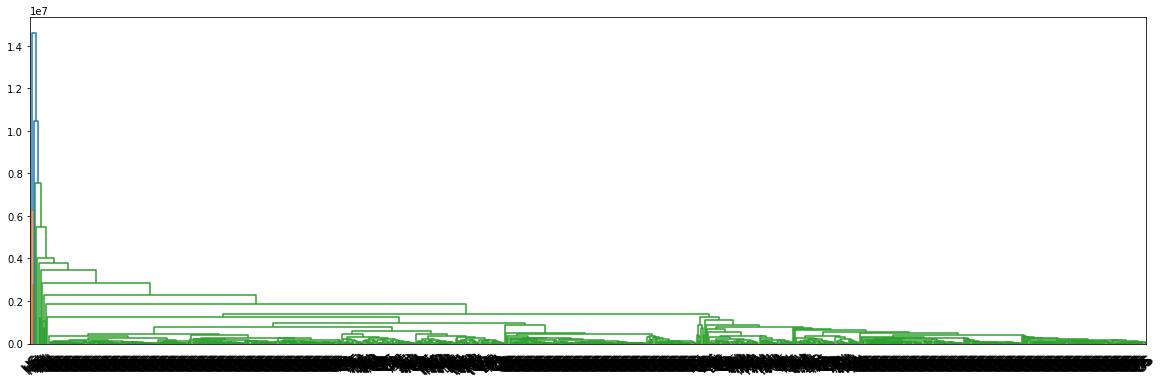

In [75]:
plt.figure(figsize = (20, 6))
merge = linkage(X, method = "complete")
dendrogram(merge, labels = countries, leaf_rotation=90, leaf_font_size= 6)
plt.xticks(rotation = 45, fontsize= 14)
plt.show()